In [5]:
library(tidyverse)

Q0. Write a function that takes a vector and replaced it with the mean of the that vector
  * Let's call that function `replace_na_mean`

  * Try your function using the following snippet:

```
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))
```

In [95]:
### Write your code here

x <- c(1, 2, NA, 3, 4, NA)

x[c(FALSE, FALSE, TRUE, FALSE, FALSE, TRUE)] = 7

print(x)




#replace_na_mean <- function(x){}


[1] 1 2 7 3 4 7


In [101]:
x_2 <- c(1, 2, NA, 3, 4, NA)

x_2[c(is.na(x_2))] = 10

print(x_2)

[1]  1  2 10  3  4 10


In [127]:


replace_na_mean <- function(some_vector){
    some_vector[c(is.na(some_vector))] = mean(some_vector, na.rm = TRUE)
    some_vector
}

replace_na_mean(c(1,2,NA,7))

[1] 1.000000 2.000000 3.333333 7.000000

Q1. Write a function that returns the sample space for the experiment consisting of samplign a 4 digit PIN
  * Call your function get_all_perms

  * Essentially, your function does not take any arguments but returns the sample space consisting of all the four digit numbers
   
  * The function `expand.grid` expand.grid creates a data frame from all combinations of the supplied vectors or factors. For example:
 
  ```expand.grid(0:1, 0:1, 0:1)```

* generates  

![](https://www.dropbox.com/s/cnlt4fg8rxd01d6/expand.grid.png?dl=1)
 

* Strategy, use `expand.grid` to generate the permutation for four verctation in the range 0:9
  * Return the number of rows in that `data.frame`

  

In [140]:
### Write your code here

get_all_perms<-function(x){
    grid = expand.grid(0:9, 0:9, 0:9, 0:9)
               nrow(grid)}



In [141]:
# Running this should return 10,000
get_all_perms()

[1] 10000

Q2. The function above is not very useful since it always computes the same thing, namely the number of possible permutation of digits. One way to make it more useful is by passing as an argument the number of digits to consider, i.e., the number of columns in `expand.grid`. Let;s call that param `size`, which by default should be `4`. For exmaple:

*  `get_all_perms(size = 1 )` will return all the number of size 1 (0-9)
*  `get_all_perms(size = 3 )` will return all the permutations of size 3 (000 - to 999)


* Hint: `expand.grid` requires the number of input parameters to match the permutation length. We need to automate that so that the number of vectors passed as input matches the `size` values passed into `get_all_perms`
  * We can do that using `replicate`
  * `replicate(2, c(1,2,3), simplify=FALSE)` will repeat the vector `c(1,2,3)` twice
    * We need to pass `replicate` the value `simplify=FALSE` so that it does not convert the output for us into a matrix
  * Use pipe (`%>%`) pass the output of `replicate` into expand.grid
  * Make sure replicated generate the correct input for exand.grid
  

In [188]:
### Write your code here

get_all_perms<-function(x, size = 4){
  if(size == 4){
  replicate(4, c(0,1,2,3,4,5,6,7,8,9), simplify=FALSE)%>%
  expand.grid()%>%
  nrow()
  }else if(size == 3){
  replicate(3, c(0,1,2,3,4,5,6,7,8,9), simplify=FALSE)%>%
  expand.grid()%>%
  nrow()
  }else if(size == 2){
  replicate(2, c(0,1,2,3,4,5,6,7,8,9), simplify=FALSE)%>%
  expand.grid()%>%
  nrow()
  }else if(size == 1){
  replicate(1, c(0,1,2,3,4,5,6,7,8,9), simplify=FALSE)%>%
  expand.grid()%>%
  nrow()
  }
      }
 

get_all_perms()
    
get_all_perms(size = 1)
    
get_all_perms(size = 2)
    
get_all_perms(size = 3)


[1] 10000

[1] 10

[1] 100

[1] 1000

Q3.

* Given a fish disease that occurs with a probability of p= 0.43
* You sampled 340 animals
* How many of these animals should you expect to see the disease in?
* Hint: you will need to compute the probability of each element of the sample space and find the value that has the highest probability

In [87]:
### Write your code here

##need to compute probabilty distribution, and find which one has the highest probability 


prob_disease <- dbinom(0:340, size = 340, prob = 0.43)

which.max(prob_disease)

##generate an array that has prob for 1, 2, 3 through 340 
##then find which position that has the maximum prob 

#Maximum likelihood is achieved when n=146 


[1] 147

Q4. Plot the two following distributions:

$$
x \sim \mathcal{N}(10, 0.5) \\
y \sim \mathcal{N}(10.2, 0.5) \\
$$

* Your plot should look like the following
![](https://www.dropbox.com/s/psrjtl6abjla7z5/sample_gaussian_plot.png?dl=1)


* Draw 40 values from the first distribution and store them in a variable called `x_sample`
* Draw 40 values from the second distribution and store them in a variable called `y_sample`
  * make sure you run the following line before you sample data
  ```set.seed(42)```
 
* Do a `t-`test to compute the `x_sample` and `y_sample`
  * A `t-`test compares two vectors of values and predicts if the two vectors are from the same distribution
  * The format for the t-test in R is
 
 `t.test(x,y)` where `x` an `y` are the vectors of values we would like to compare.
  * Look at the `p-value`, if it's smaller than say 0.05, then there is a statistically significant difference between the two datasets.

* Do you agree with the conclusion of the `t-test`. In other words, would you be comfortable reporting in a publication that the data in `x_sample` and `y_sample` are statistically different?

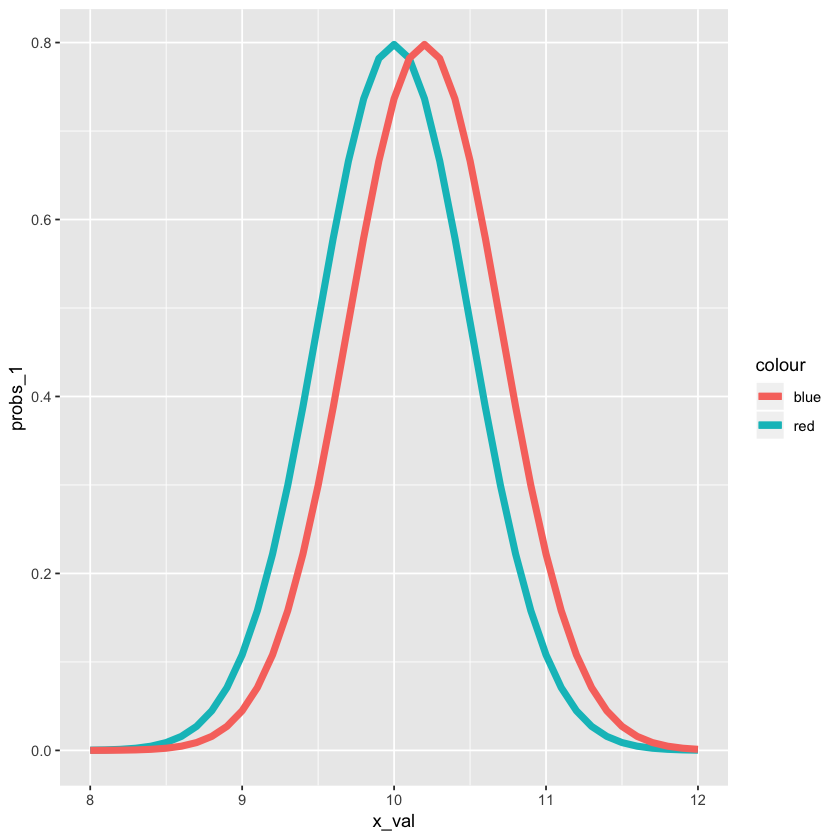

In [74]:
# Write the code to draw the plot here

x_val <- seq(8, 12, 0.1)
probs_1 <- dnorm(x_val, mean = 10, sd = 0.5)
probs_2 <- dnorm(x_val, mean = 10.2, sd = 0.5)


ggplot() + 
  geom_line(aes(x=x_val, y=probs_1, color = "red"), size = 2)+
  geom_line(aes(x=x_val, y=probs_2, color = "blue"), size = 2)


In [73]:
set.seed(42) #forces it to utilize the same random values

x_sample<-rnorm(40, 10, 0.5)
#print(x_sample)


y_sample<-rnorm(40, 10.2, 0.5)
#print(y_sample)


t.test(x = x_sample, y = y_sample)


	Welch Two Sample t-test

data:  x_sample and y_sample
t = -2.1504, df = 72.3, p-value = 0.03486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.50040708 -0.01897381
sample estimates:
mean of x mean of y 
 9.980232 10.239922 


   x_val      probs_1      probs_2
1    8.0 0.0002676605 4.988494e-05
2    8.1 0.0005838939 1.178861e-04
3    8.2 0.0012238039 2.676605e-04
4    8.3 0.0024644383 5.838939e-04
5    8.4 0.0047681764 1.223804e-03
6    8.5 0.0088636968 2.464438e-03
7    8.6 0.0158309032 4.768176e-03
8    8.7 0.0271659385 8.863697e-03
9    8.8 0.0447890606 1.583090e-02
10   8.9 0.0709491857 2.716594e-02
11   9.0 0.1079819330 4.478906e-02
12   9.1 0.1579003166 7.094919e-02
13   9.2 0.2218416694 1.079819e-01
14   9.3 0.2994549313 1.579003e-01
15   9.4 0.3883721100 2.218417e-01
16   9.5 0.4839414490 2.994549e-01
17   9.6 0.5793831055 3.883721e-01
18   9.7 0.6664492058 4.839414e-01
19   9.8 0.7365402806 5.793831e-01
20   9.9 0.7820853880 6.664492e-01
21  10.0 0.7978845608 7.365403e-01
22  10.1 0.7820853880 7.820854e-01
23  10.2 0.7365402806 7.978846e-01
24  10.3 0.6664492058 7.820854e-01
25  10.4 0.5793831055 7.365403e-01
26  10.5 0.4839414490 6.664492e-01
27  10.6 0.3883721100 5.793831e-01
28  10.7 0.299454931

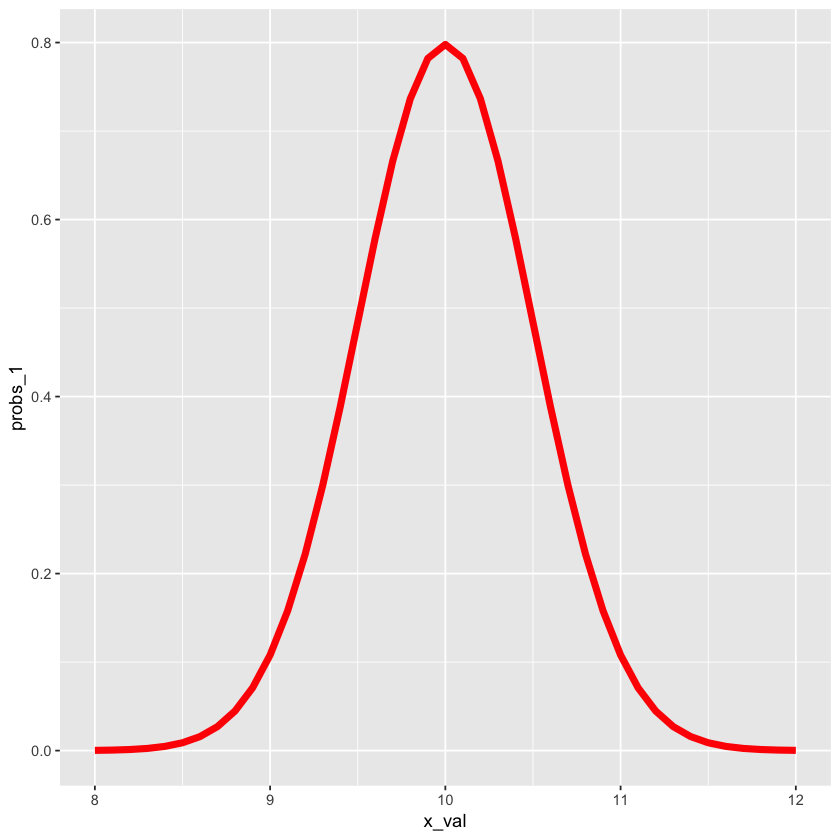

In [55]:
x_val <- seq(8, 12, 0.1)
probs_1 <- dnorm(x_val, 10, 0.5)
probs_2 <- dnorm(x_val, 10.2, 0.5)

probs_all<-data.frame(x_val, probs_1, probs_2)

print(probs_all)


ggplot(probs_all, aes(x=x_val)) + 
  geom_line(aes(x=x_val, fill=), color = "red", size = 2)

In [8]:
# Write the code to run your t-test here


Q5. Challenge

* We have used the function `dnorm` to plot the bell-shaped curve for a distribution $ x \sim \mathcal{N}(10, 0.5)$
  * Use seq(8, 12, 0.1) to generate the x-axis values
  * The pdf should look like the following

![](https://www.dropbox.com/s/jl2c2atpkxze7ev/sample_pdf_sum_question.png?dl=1)

* Use `dnorm` to compute the probability density for each point along the $x-$axis generated using `seq()` above
  * What do you notice?
  * How do you fix that?
  


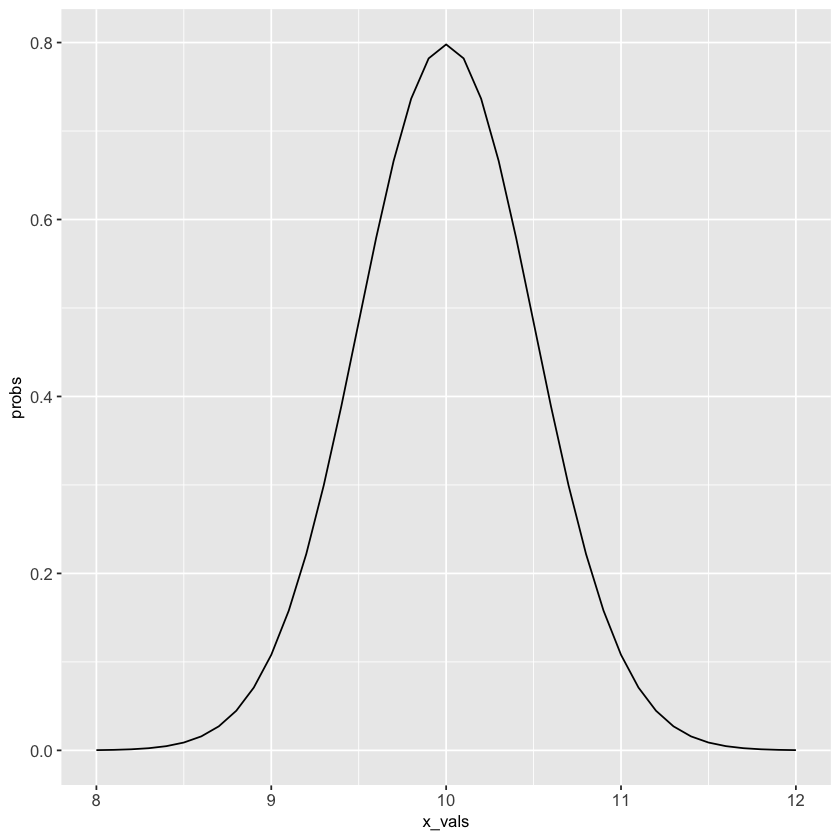

In [12]:
# Write the code to run your t-test here

x_vals <- seq(8, 12, 0.1)
probs <- dnorm(x_vals, mean = 10, sd = 0.5)


ggplot() + 
  geom_line(aes(x=x_vals, y=probs)) +
  theme(axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) + 
  theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10))

In [27]:
# take vector make small 0.1 wide sections and then sum 

print(sum(probs*0.1))


[1] 0.9999599
